## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df=pd.read_csv('ab_data.csv') # reading data 
df.head(5) 

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [15]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [38]:
df.query('landing_page =="new_page" & group!="treatment"')['timestamp'].count()+df.query('landing_page !="new_page" & group=="treatment"')['timestamp'].count()

3893

f. Do any of the rows have missing values?

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


<h5 style="color:red;"> There are not any missing values</h1>

In [40]:
df.group.value_counts()   # number of users in each group 

treatment    147276
control      147202
Name: group, dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [87]:
# create clean data set which i can use in analysing
#dataset include only users who belong to  treatment  Group and receive new page and who belonged to control Group receive old page
df_temp=df.query('landing_page =="new_page" & group=="treatment"')
df_temp2=df.query('landing_page =="old_page" & group=="control"')

df2=pd.concat([df_temp,df_temp2], ignore_index=True)

df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [88]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [89]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [90]:
len(df2.user_id)

290585

<h5 style="color:red;">there  is  only one userid duplicated  <h5>

In [91]:
df2['is_duplicated'] = df2.duplicated(['user_id'])  # to find the duplicate user_id 
df2.query('is_duplicated==True')['user_id']

1404    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [92]:
df2.query('user_id=="773192"')  

,user_id,timestamp,group,landing_page,converted,is_duplicated
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [93]:
df2.drop_duplicates(subset ='user_id',keep='first',inplace=True) #remove  duplicate user_id
df2.query('user_id=="773192"')

,user_id,timestamp,group,landing_page,converted,is_duplicated
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False


In [94]:
df2=df2.drop(['is_duplicated'],axis=1) # drop temp column is_duplicated  we do not need it any more 

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [95]:
P_converting=df2.converted.mean()
P_converting

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [96]:
df_temp=df2.query('group=="control"')
P_control=df_temp.groupby('group')['converted'].mean()
P_control ##  probability of  control group

group
control    0.120386
Name: converted, dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [97]:
df_temp=df2.query('group=="treatment"')
P_treatment=df_temp.groupby('group')['converted'].mean()
P_treatment ##  probability of  treatment group

group
treatment    0.118808
Name: converted, dtype: float64

d. What is the probability that an individual received the new page?

In [99]:
P_newPage=len(df2.query('landing_page=="new_page"')['user_id'])/len(df2['user_id'])
P_newPage # probability that an individual received the new page

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<h5 style="color:blue;"> There are no sufficient evidence  that the new treatment page leads to more conversions because the propbabilities of make conversions in two groups(control 'P_control' and treatment'P_treatment' are Almost equal Taking into account the  probability that an individual received the new page is 50% and old page 50% </h5>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here**

H0 : Pold >= Pnew

H1 : Pold < Pnew

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [100]:
P_new=df2.converted.mean()
P_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [101]:
P_old=df2.converted.mean()
P_old

0.11959708724499628

c. What is $n_{new}$?

In [102]:
n_new=df2.query('landing_page=="new_page"')['user_id'].count()
n_new

145310

d. What is $n_{old}$?

In [103]:
n_old=df2.query('landing_page=="old_page"')['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [104]:
df_newPage=df2.query('landing_page=="new_page"')
df_newPage_sample=df_newPage.sample(df_newPage.shape[0])
new_page_converted=[]
for _ in range(10000):
    bootsample=df_newPage_sample.sample(df_newPage.shape[0],replace=True)
    new_page_converted.append(bootsample.converted.mean())


In [105]:
np.std(new_page_converted)

0.000853590056265565

(array([  16.,  143.,  676., 1756., 2774., 2686., 1364.,  474.,  101.,
          10.]),
 array([0.11655054, 0.11717471, 0.11779889, 0.11842306, 0.11904724,
        0.11967141, 0.12029559, 0.12091976, 0.12154394, 0.12216811,
        0.12279229]),
 <a list of 10 Patch objects>)

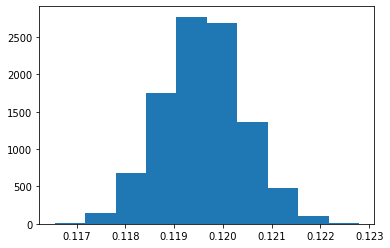

In [65]:
null_vall=np.random.normal(P_new,np.std(new_page_converted),10000) 
plt.hist(null_vall) # sample distribution for converted  rate in new page if it come from the null hypthsis 

<h5 style="color:red;">This sampling distribution for conversion rate in new page is looking like if it came from the null This sampling distribution for conversion rate in new page is looking like if it came from the null  hypothesis
<h5>

In [66]:
df_newPage_sample.converted.mean()

0.11880724790277405

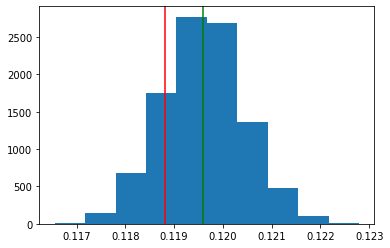

In [69]:
plt.hist(null_vall)
plt.axvline(P_new,color='green') ## where null hypothsis mean in this distribution
plt.axvline(df_newPage_sample.converted.mean(),color='r') ## where sample mean falls in this distribution

<h5 style="color:blue;"> sample mean(with red)were to fall closer to  the center value p_new( 0.1195 in green) so the null  is more likely to be true<h5>

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [106]:
df_oldPage=df2.query('landing_page=="old_page"')
df_oldPage_sample=df_oldPage.sample(df_oldPage.shape[0])
old_page_converted=[]
for _ in range(10000):
    bootsample=df_oldPage_sample.sample(df_oldPage.shape[0],replace=True)
    old_page_converted.append(bootsample.converted.mean())


(array([7.000e+00, 6.600e+01, 5.360e+02, 1.801e+03, 3.120e+03, 2.782e+03,
        1.332e+03, 3.080e+02, 4.500e+01, 3.000e+00]),
 array([0.11616232, 0.11687263, 0.11758293, 0.11829324, 0.11900355,
        0.11971386, 0.12042416, 0.12113447, 0.12184478, 0.12255509,
        0.12326539]),
 <a list of 10 Patch objects>)

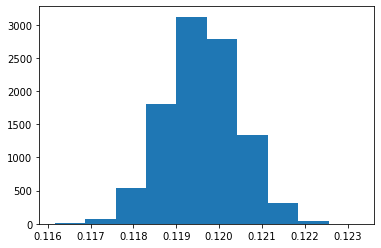

In [109]:
null_vall=np.random.normal(P_old,np.std(old_page_converted),10000)
plt.hist(null_vall) # sample distrbution for convarsion rate in new page if it come from the null hypthesis

In [107]:
df_oldPage_sample.converted.mean()

0.1203863045004612

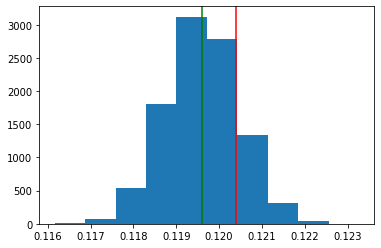

In [110]:
plt.hist(null_vall)
plt.axvline(P_old,color='green') ## where null hypothesis mean in this distribution
plt.axvline(df_oldPage_sample.converted.mean(),color='r') ## where sample mean falls in this distribution

<h5 style="color:blue;"> sample mean of converted rate were to fall closer to  the center value p_old( 0.1195 in green) so the null  is more likely to be true<h5>

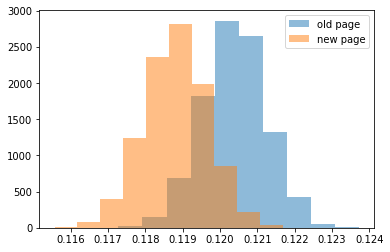

In [112]:
plt.hist(old_page_converted, alpha = 0.5,label="old page"); # sample distribution of convered rate of old page
plt.hist(new_page_converted, alpha = 0.5,label="new page"); # sample distribution of convered rate of new page
plt.legend()

<h5 style="color:red;"> the two shape are sampling distributions duo to  the Central Limit Theorem</h5>

<h5 style="color:red;"> conversion rate for old page in most cases greater than new page</h5>

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [116]:
diff=df_oldPage_sample.converted.mean()-df_newPage_sample.converted.mean() # the differnce mean which is  observed from statistic
diff #  difference  observed

0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [113]:
p_diffs=[]
for _ in range(10000):
    df_oldpageTemp=df_oldPage_sample.sample(df_oldPage.shape[0],replace=True)
    df_newpageTemp=df_newPage_sample.sample(df_newPage.shape[0],replace=True)
    p_diffs.append(df_oldpageTemp.converted.mean()-df_newpageTemp.converted.mean())
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  12.,  146.,  652., 1691., 2618., 2621., 1572.,  541.,  130.,
          17.]),
 array([-0.00275073, -0.00187734, -0.00100395, -0.00013055,  0.00074284,
         0.00161623,  0.00248963,  0.00336302,  0.00423642,  0.00510981,
         0.0059832 ]),
 <a list of 10 Patch objects>)

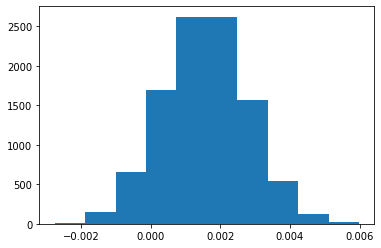

In [114]:
plt.hist(p_diffs) # They look pretty normal to me as i expected 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

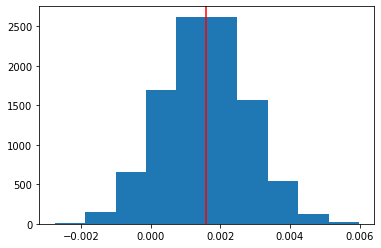

In [118]:
plt.hist(p_diffs)
plt.axvline(diff,color='r')# observed difference 

<h5 style="color:red;"> Reight to red line proportion of the p_diffs are greater than the actual difference observed</h5>

In [119]:
(p_diffs>diff).mean() #proportion of the p_diffs are greater than the actual difference observed 

0.499

In [120]:
null_vall=np.random.normal(0,np.std(p_diffs),10000)# normal distribution as sample mean come from the null
(null_vall < diff).mean() # alternative hypothesis 

0.9068

<h5 style="color:red;"> we calculte p_value based on  the shared region started from observed statistic(diff) through the tail</h5>

<h5 style="color:blue;"> we can not reject the null   that the old page is better 

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<h5 style="color:blue;"> i compute p value . if its value is greater than error rate 0.05, it means that we can not reject our null hypothesis which is the old page better than the new page regard the conversion rate </h5>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [14]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page"& converted==True')['user_id'].count()
convert_new = df2.query('landing_page=="new_page"& converted==True')['user_id'].count()
n_old =len(df2.query('landing_page=="old_page"'))
n_new =len(df2.query('landing_page=="new_page"'))


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [101]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([convert_old,convert_new])
nobs = np.array([n_old,n_new])
stat, pval = proportions_ztest(count,nobs,alternative='smaller')
print('z_stat: %0.3f, p_value: %0.3f' % (stat, pval))

z_stat: 1.311, p_value: 0.905


<h5 style="color:red;"> p_value is greater than 0.05 we can not reject the null</h5>

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<h5 style="color:blue;"> from  z test we can not regect the null hypothesis that converted rate for old bage is greater or equal the converted rate for new page as i computed  in part j. and k.</h5>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [115]:
  # df2 is the dataset after cleaning 
df2['intercept']=1
##df2[['new_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2[['control','ab_page']]=pd.get_dummies(df2['group'])
df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1
5,929503,2017-01-18 05:37:11.527370,treatment,new_page,0,1,0,1
6,834487,2017-01-21 22:37:47.774891,treatment,new_page,0,1,0,1
7,803683,2017-01-09 06:05:16.222706,treatment,new_page,0,1,0,1
8,944475,2017-01-22 01:31:09.573836,treatment,new_page,0,1,0,1
9,718956,2017-01-22 11:45:11.327945,treatment,new_page,0,1,0,1


In [116]:
df3=df2.drop(['user_id','group','landing_page','control'],axis=1)
df3.head()

,timestamp,converted,intercept,ab_page
0,2017-01-11 16:55:06.154213,0,1,1
1,2017-01-08 18:28:03.143765,0,1,1
2,2017-01-19 03:26:46.940749,1,1,1
3,2017-01-04 17:58:08.979471,1,1,1
4,2017-01-15 18:11:06.610965,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [117]:
log_mod=sm.Logit(df3['converted'],df3[['intercept','ab_page']])
res=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [118]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        04:10:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**0.190 is the p_value associated with ab_page which differ from Part II because here p_value is two-tailed test but in part II p value one_tailed**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**adding more factor make our pridict more accurate and gives us more of the information available to us who estimate the dependent variable**

**disadvantages are may a linear relationship doesent exist and may be our predictor variables correlated with one anther**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [131]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [122]:
df_new.country.value_counts()# values in country coulmn 

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [132]:
dn=pd.get_dummies(df_new['country'])
dn2=pd.get_dummies(df_new['landing_page'])
df_new=df_new.join(dn)
df_new=df_new.join(dn2)


In [133]:
df_new.head()

,country,timestamp,group,landing_page,converted,CA,UK,US,new_page,old_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,0


In [134]:
df_new['intercept']=1
log_mod=sm.Logit(df_new['converted'],df_new[['intercept','CA','UK']])
res=log_mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        01:32:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

<h5 style="color:red;"> p_values for CA is 0.129 und UK is 0.746 which > 0,05 which mean these variables are not Statistically Significant in in predicting conversion</h5>

<h5 style="color:blue;">country appear that it had not an impact on conversion</h5>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [136]:
### Fit Your Linear Model And Obtain the Results
##df_new['intercept']=1
#dn2=pd.get_dummies(df_new['landing_page'])
#df_new=df_new.join(dn2)
log_mod=sm.Logit(df_new['converted'],df_new[['intercept','CA','UK','old_page']])
res=log_mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        01:33:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
old_page       0.0149      0.011      1.307      0.191      -0.007       0.037
==============================================================================
"""

<h5 style="color:blue;">coefficient for country and ab_page do not change between when they were in different model (simple linear regression)and when they in same model which mean that they are independent variables</h5>

In [137]:
#adding this variable to my analysis,weekdays
import datetime
df_new['timestamp'] = pd.to_datetime(df_new['timestamp'])

df_new['weekday2'] = df_new['timestamp'].dt.day_name()
dn=pd.get_dummies(df_new['weekday2'])
df_new=df_new.join(dn)

df_new.head()

,country,timestamp,group,landing_page,converted,CA,UK,US,new_page,old_page,intercept,weekday2,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
user_id,,,,,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,0,1,1,Saturday,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,0,1,Monday,0,1,0,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,0,1,Monday,0,1,0,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,0,1,1,Sunday,0,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,0,1,Monday,0,1,0,0,0,0,0


In [138]:
log_mod=sm.Logit(df_new['converted'],df_new[['intercept','CA','UK','old_page','Friday','Monday','Saturday','Thursday','Tuesday','Wednesday']])
res=log_mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366103
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290574
Method:                           MLE   Df Model:                            9
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:               4.925e-05
Time:                        01:45:27   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3131
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0150      0.017   -118.867      0.000      -2.048      -1.982
CA            -0.0407      0.027     -1.514      0.130      -0.093       0.012
UK             0.0100      0.013      0.755      0.450      -0.016       0.036
old_page       0.0149      0.011      1.302      0.193      -0.008       0.037
Friday        -0.0171      0.022     -0.777      0.437      -0.060       0.026
Monday         0.0254      0.021      1.202      0.229      -0.016       0.067
Saturday       0.0223      0.022      1.022      0.307      -0.020       0.065
Thursday       0.0143      0.022      0.652      0.514      -0.029       0.057
Tuesday        0.0101      0.021      0.482      0.630      -0.031       0.051
Wednesday      0.0178      0.022      0.814      0.415      -0.025       0.061
==============================================================================
"""

<h5 style="color:red;"> there is no interaction between page and country and had not significant effects on conversion because the coef when we looked at the individual factors of country and page on conversion  in d. and g.   is the same when we looked at them together in same model in h.</h5>

<a id='conclusions'></a>
## Conclusions

<h5 style="color:green;"> All tests showing that old page is better than new page regard to coversion rate so may it is realy better or we need more influences or  new predictor instead of conversion rate to be sure from our results</h5

